In [8]:
import fick1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

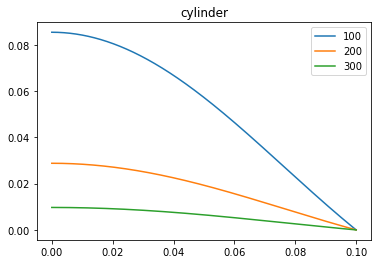

In [14]:
times = [100,200,300]               # 100,200,300 seconds after diffusion starts
slab_thickness = .1                 # .1 meters thick slab
diffusivity = 1.88e-5               # diffusivity of material to be simulated in m^2/s
interface_concentration = .5        # concentration at interface for slab in m^2/s
initial_concentration = 0           # initial concenttration for slab in m^2/s

results = fick1d.cylinder.cylinder( times,
                            slab_thickness, 
                            diffusivity, 
                            interface_concentration, 
                            initial_concentration)

for i in range(len(times)):
    plt.title('cylinder')
    plt.plot(np.linspace(0,slab_thickness,1000),results[i],label = str(times[i]))
plt.legend()
plt.show()

In [15]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
%matplotlib inline

In [16]:
###variable declarations
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
un = numpy.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

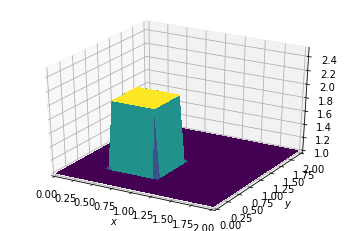

In [17]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [18]:
###Run through nt timesteps
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
    

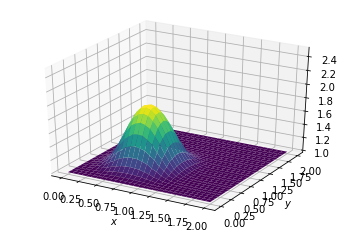

In [19]:
diffuse(10)

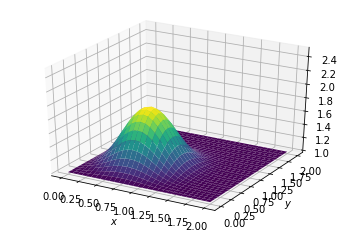

In [20]:
diffuse(14)

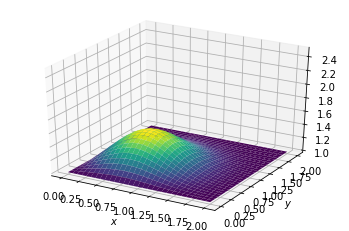

In [21]:
diffuse(50)

In [28]:

x2=np.linspace(0,slab_thickness,1000)
Dab = 1.88e-5

x1=0
cA1=90

mdot=
